In [58]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import rgb2hex

width = 4
height = 8

container = numpy.full((height, width), 0)

# Objects represented as a list of [width, height]
objects = [[3, 1], [3, 3], [5, 1], [4, 2], [3, 2]]


def visualize(container, assigned):
    colors = cm.get_cmap("rainbow", len(assigned))

    row, col = container.shape
    tbl = plt.table(
        cellText=container, cellLoc="center", loc="center", colWidths=[0.1] * col
    )
    plt.axis("off")
    plt.axis("tight")
    for j in range(row):
        for k in range(col):
            cell = tbl[j, k]
            cell.set_height(0.1)
            if cell._text.get_text() == "0":
                cell._text.set_text("")
            else:
                cell.set_facecolor(rgb2hex(colors(int(cell._text.get_text()) - 1)[:3]))
    plt.show()


def fit(container, object, obj_index, rotate=True):
    # Try fitting the object into the container
    # Start from the top left, move first down and then to the right
    obj_w = object[0]
    obj_h = object[1]
    for i in range(height - obj_h + 1):
        for j in range(width - obj_w + 1):
            placement = container[i : i + obj_h, j : j + obj_w]
            if placement.sum() == 0:
                container[i : i + obj_h, j : j + obj_w] = obj_index
                return True

    # If all else fails, rotate and try again
    if rotate:
        return fit(container, object[::-1], obj_index, rotate=False)


def largest_first(container, objects):
    excluded = []
    assigned = []
    # Sort the objects by area
    objects.sort(key=lambda obj: obj[0] * obj[1], reverse=True)
    for obj in objects:
        if not fit(container, obj, objects.index(obj) + 1):
            excluded.append(objects.index(obj) + 1)
        else:
            assigned.append(objects.index(obj) + 1)
    if excluded: print(f"Items excluded: {len(excluded)}")
    visualize(numpy.flip(container, axis=0), assigned)


def smallest_width_first(container, objects):
    excluded = []
    assigned = []
    # Sort the objects by width, and then area
    objects.sort(key=lambda obj: (obj[0], obj[0] * obj[1]))
    for obj in objects:
        if not fit(container, obj, objects.index(obj) + 1):
            excluded.append(objects.index(obj) + 1)
        else:
            assigned.append(objects.index(obj) + 1)
    if excluded: print(f"Items excluded: {len(excluded)}")
    visualize(numpy.flip(container, axis=0), assigned)


Items excluded: 1


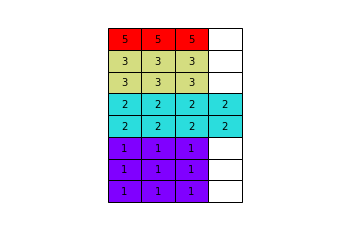

In [59]:
container = numpy.full((height,width), 0)
largest_first(container, objects)

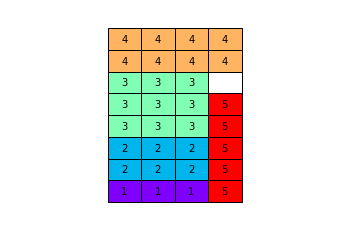

In [57]:
container = numpy.full((height,width), 0)
smallest_width_first(container, objects)